# Part I - FordGoBike System Data Exploration
## by Adegbite Moriam Adesola

This document explores a dataset containing information about individual rides in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# number of rows and columns
df.shape 

(183412, 16)

In [4]:
# print first 5 rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# data types and properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# data summary
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# number of duplicated rows
sum(df.duplicated())

0

No duplicated rows

In [8]:
print(df.columns.values)

['duration_sec' 'start_time' 'end_time' 'start_station_id'
 'start_station_name' 'start_station_latitude' 'start_station_longitude'
 'end_station_id' 'end_station_name' 'end_station_latitude'
 'end_station_longitude' 'bike_id' 'user_type' 'member_birth_year'
 'member_gender' 'bike_share_for_all_trip']


In [9]:
# number of unique values in the dataset
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [10]:
# sum of null values in each column
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Five columns have rows with null values

**Issues**
1. Null values
2. Start and end time datatype is not datetype
3. Bike id has integer datatype
4. Combined hour, day and year

## Data Cleaning

Define: Remove rows with missing values

Code

In [11]:
df.dropna(inplace=True)

Test

In [12]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

Define: Change start and end time datatype to datetype

Code

In [13]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

Test

In [14]:
print(df['start_time'].dtype)
print(df['end_time'].dtype)

datetime64[ns]
datetime64[ns]


Define: Change bike id datatype to string

Code

In [15]:
df['bike_id'] = df.bike_id.astype(str)

Test

In [16]:
print(df['bike_id'].dtype)

object


Define: Extract hour, day, month and year columns from the start and end date

Code

In [17]:
import datetime as dt
df['start_hr'] = df['start_time'].dt.hour
df['start_hr'] = df.start_hr.astype(str)
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['start_year'] = df['start_time'].dt.year
df['start_year'] = df.start_year.astype(str)

df['end_hr'] = df['end_time'].dt.hour
df['end_hr'] = df.end_hr.astype(str)
df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_year'] = df['end_time'].dt.year
df['end_year'] = df.end_year.astype(str)

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_hr,start_day,start_month,start_year,end_hr,end_day,end_month,end_year
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,17,Thursday,February,2019,8,Friday,March,2019
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,12,Thursday,February,2019,5,Friday,March,2019
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,17,Thursday,February,2019,4,Friday,March,2019
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,23,Thursday,February,2019,0,Friday,March,2019
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,23,Thursday,February,2019,0,Friday,March,2019


Test

In [18]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
start_hr                           object
start_day                          object
start_month                        object
start_year                         object
end_hr                             object
end_day                            object
end_month                          object
end_year                          

In [19]:
df.start_year.nunique()

1

In [20]:
df.end_year.nunique()

1

The start and end year included in the dataset is 2019

In [21]:
df.shape

(174952, 24)

In [22]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,2001.000000


### What is the structure of your dataset?

The downloaded dataset has 183412 rows and 16 columns. After cleaning, the dataset has a shape of 174952 rows (rides) and 24 columns (features/variables). The dataset has 1 integer, 2 datatimes, 7 floats, while the others are string datatype.

### What is/are the main feature(s) of interest in your dataset?

I'm interested in the trip duration, the hour, day and month of the trips, and if the user type, member birth year and gender influences the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features that can support my investigation are `duration_sec`, `start_hour`, `start_day`, `start_month`, `end_hour`, `end_day`, `end_month`, `user_type`, `member_birth_year`, `member_gender`.

## Univariate exploration

__Firstly, I'll like to check the distribution of the trip duration in the ford gobike data.__

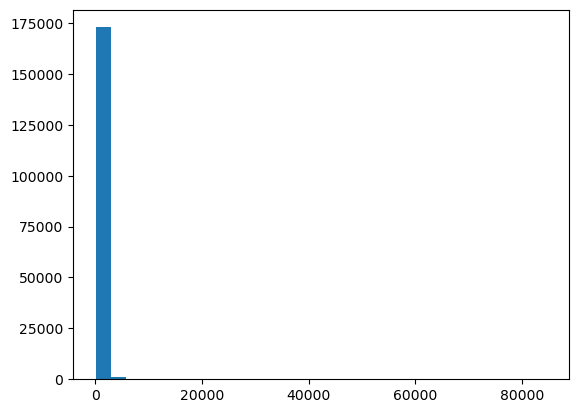

In [23]:
plt.hist(data = df, x = 'duration_sec', bins = 30);

One needs to take a closer look at the plot above as there are lots of outliers.

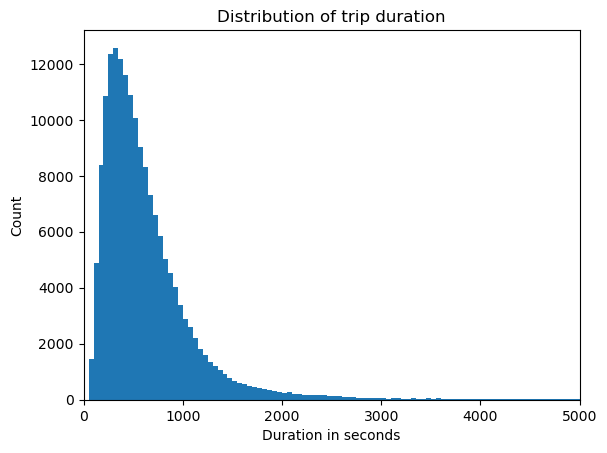

In [24]:
bins = np.arange(50, df['duration_sec'].max()+50, 50)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in seconds')
plt.ylabel('Count')
plt.title('Distribution of trip duration')
plt.xlim([0, 5000]);

The plot of the bike trip duration above shows that the distribution of the trip duration in seconds is left-skewed and unimodal with most trip duration below 1000 seconds. A long tail distribution is also observed.

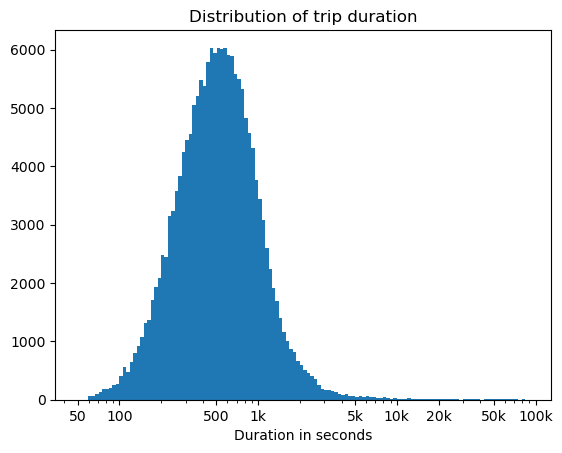

In [25]:
# ploting the log transformation of duration
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration in seconds')
plt.title('Distribution of trip duration');

The plot shows the peak to be around 500 seconds and there is a smooth fall from the peak to 2000 seconds.

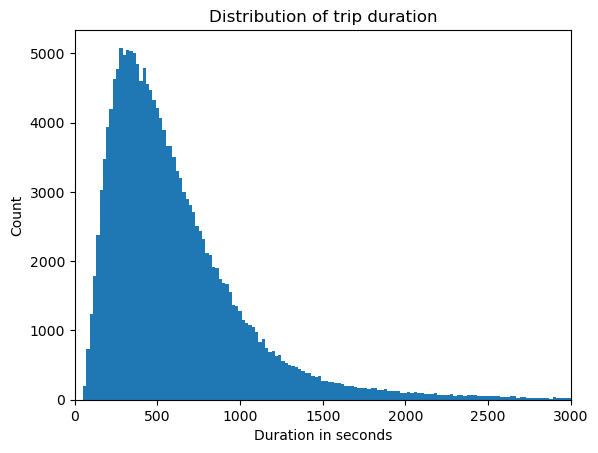

In [26]:
bins = np.arange(50, df['duration_sec'].max()+20, 20)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in seconds')
plt.ylabel('Count')
plt.title('Distribution of trip duration')
plt.xlim([0, 3000]);

Using a smaller bin size, the plot shows that the distribution has three close peaks. 

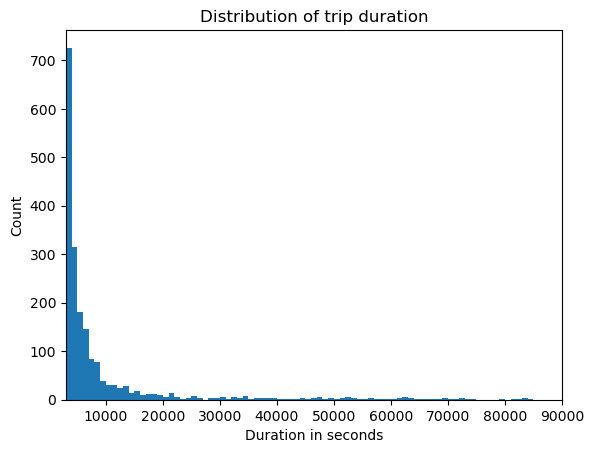

In [27]:
# exploring the tail part of the distribution
bins = np.arange(3000, df['duration_sec'].max()+1000, 1000)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.ylabel('Count')
plt.xlabel('Duration in seconds')
plt.title('Distribution of trip duration')
plt.xlim([3000, 90000]);

__Next, I'll like to explore the user types of the bike data.__

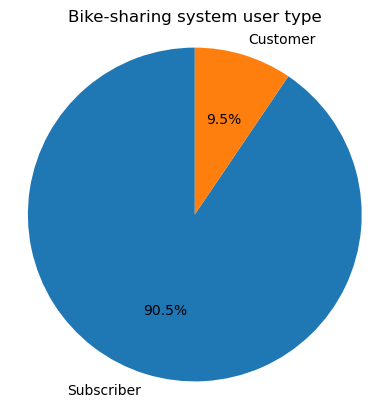

In [28]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('square')
plt.title('Bike-sharing system user type');

90.5% of riders were subscribers of the bike-sharing system.

__What are riders gender and what is their frequency?__

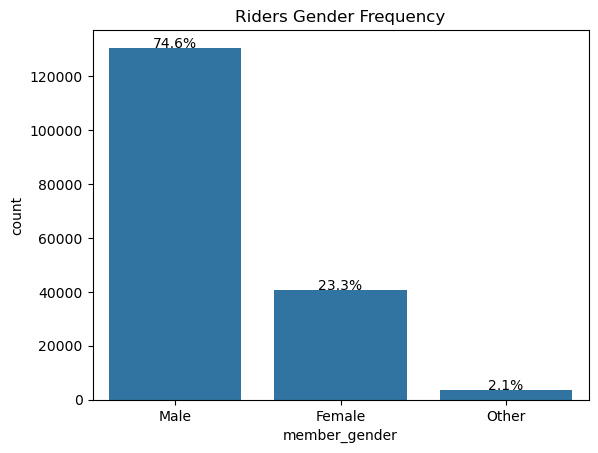

In [29]:
base_color = sb.color_palette()[0]
order = df.member_gender.value_counts().index
ax = sb.countplot(data = df, x = 'member_gender', color = base_color, order = order)
plt.title('Riders Gender Frequency')

total = len(df)
for a in ax.patches:
    percentage = '{:.1f}%'.format(100 * a.get_height()/total)
    x = a.get_x() + a.get_width()/2
    y = a.get_height()+.05
    ax.annotate(percentage, (x, y), ha ='center')
plt.show();

The dominant gender of the riders is the male gender (74.6%) while females are 23.3%. 2.1% are neither males nor females (Other).

__How about the member birth year distribution?__

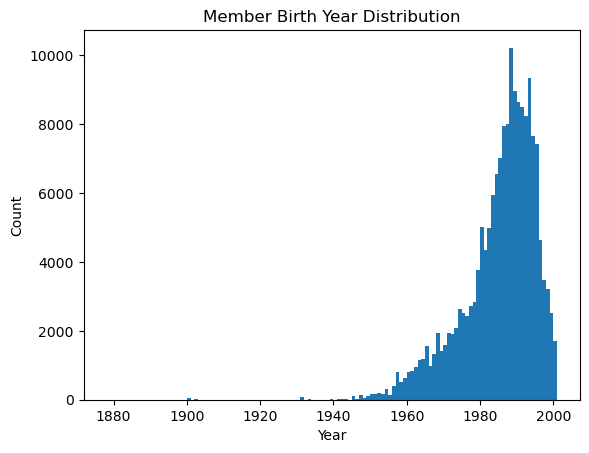

In [30]:
bins = np.arange(1878, df['member_birth_year'].max()+1, 1)
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Member Birth Year Distribution');

The distribution above is right-skewed but needs to be taken a closer look at. Most riders were born around 1990.

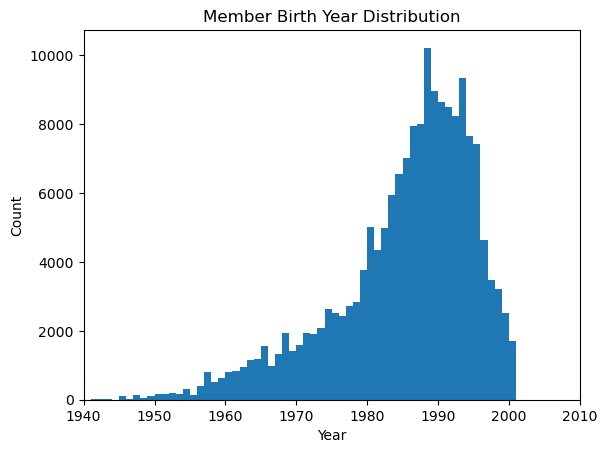

In [31]:
# upper end of the distribution
bins = np.arange(1940, df['member_birth_year'].max()+1, 1)
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.xlim([1940, 2010])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Member Birth Year Distribution');

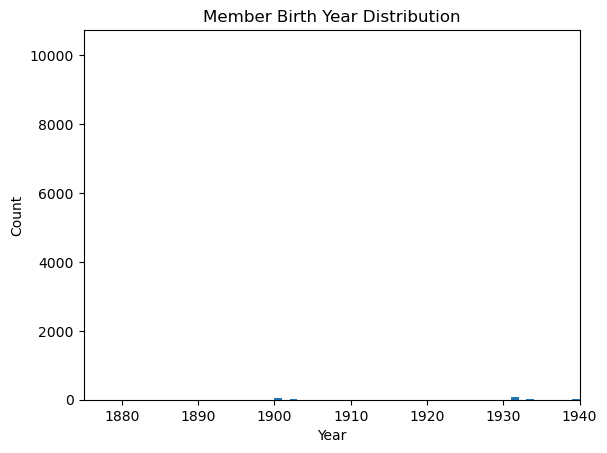

In [32]:
# lower end of the distribution
bins = np.arange(1875, df['member_birth_year'].max()+1, 1)
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.xlim([1875, 1940])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Member Birth Year Distribution');

The plot shows that there are riders born around 1900 and 1931.

__How many rides per week? (start and end day and hour)__

In [33]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

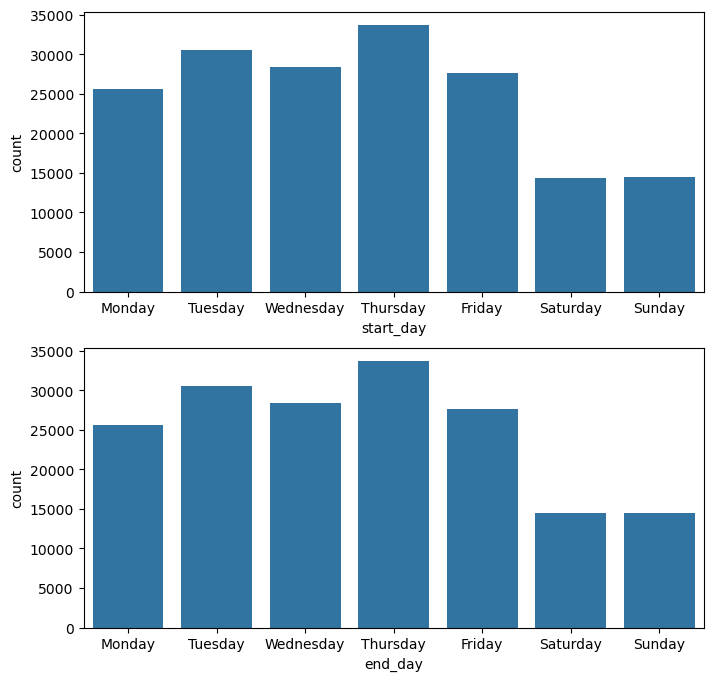

In [34]:
# ride day frequency
fig, ax = plt.subplots(2,  figsize = [8,8])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_day', color = base_color,  ax = ax[0])
sb.countplot(data = df, x = 'end_day', color = base_color,  ax = ax[1]);

The start and end days are the same. Most trips occured on Thursday. Then Tuesday, Wednesday, Friday and Monday. Saturday and Sunday has the least number of rides.

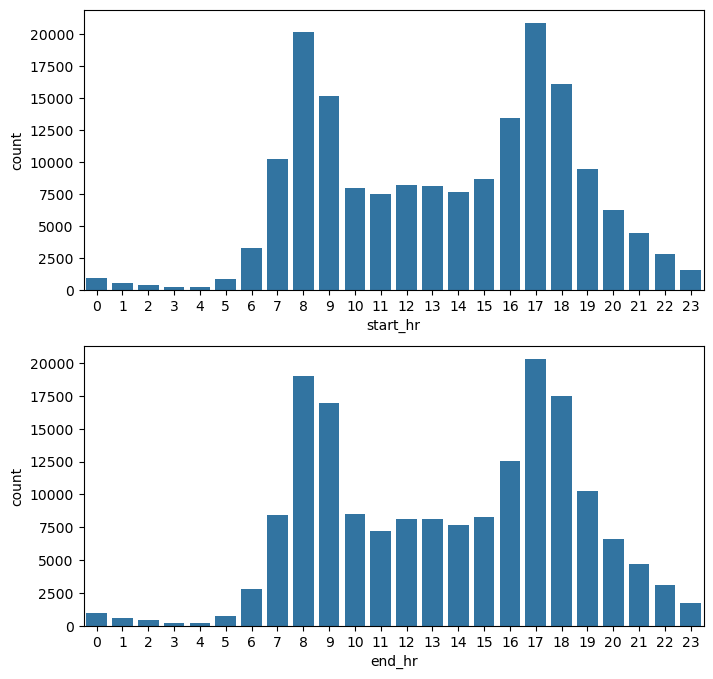

In [35]:
# frequency of ride hours
fig, ax = plt.subplots(2,figsize = [8,8])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_hr', color = base_color,  ax = ax[0])
sb.countplot(data = df, x = 'end_hr', color = base_color, ax = ax[1]);

Rides mostly started at the 17th and 8th hour, and an hour after for both hours. That is 5pm, 8am, 6pm and 9am. This can be attributed to the rush hours in the morning and evening. The same is true for the end hour of the rides. 
The start hour of the rides decreased progressively for the 17th hour to the 4th hour, while it then begin to rise from the 4th hour to 8th hour. The 3rd and 4th hours has the least record of rides.

__How many trip records are there in each month?__

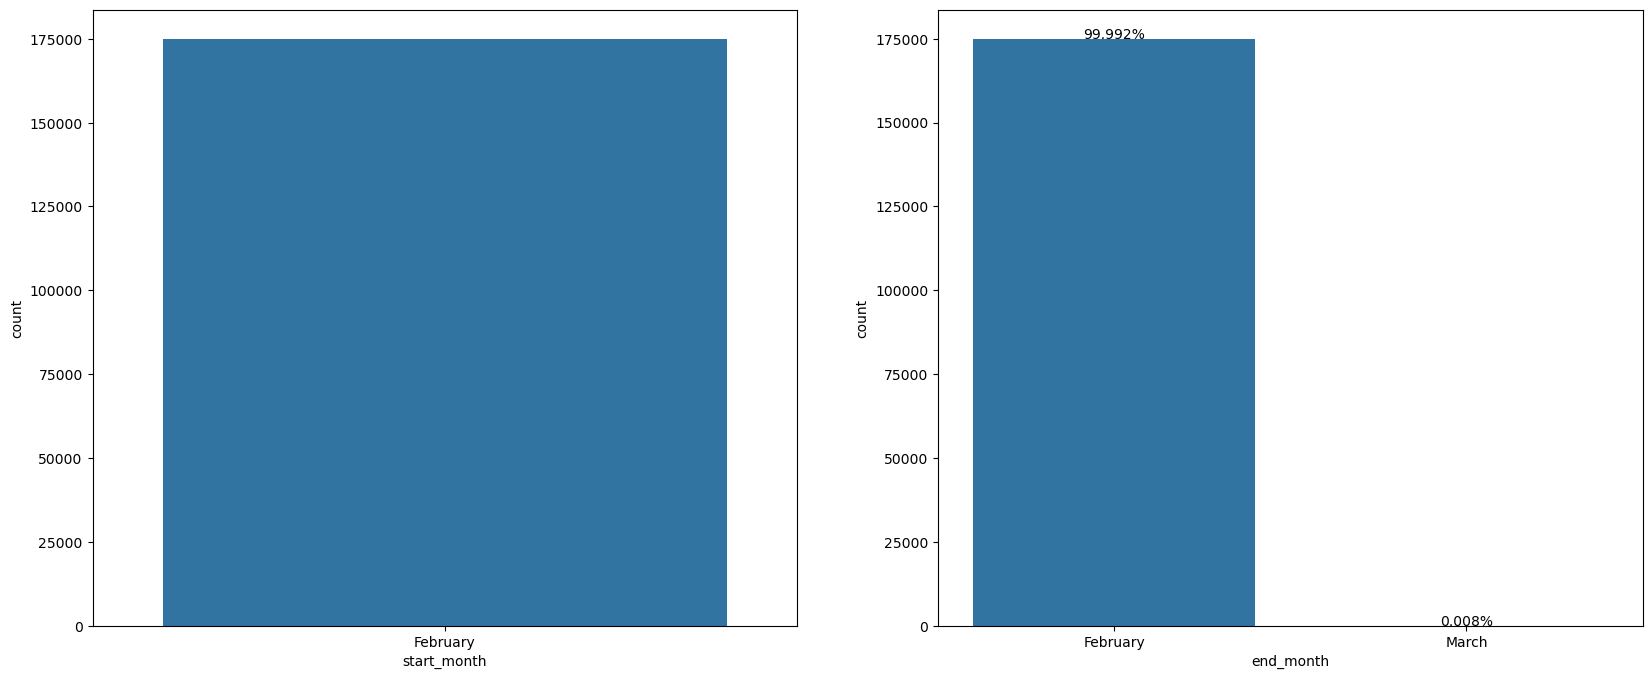

In [36]:
plt.figure(figsize = [20, 8])
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_month', color = base_color)

plt.subplot(1,2,2)
base_color = sb.color_palette()[0]
order = df.end_month.value_counts().index
ax = sb.countplot(data = df, x = 'end_month', color = base_color, order = order)

total = len(df)
for a in ax.patches:
    percentage = '{:.3f}%'.format(100 * a.get_height()/total)
    x = a.get_x() + a.get_width()/2
    y = a.get_height()+.05
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show();

All trips started in February, while all except 0.008% ended in February as well.

## Bivariate exploration

__What is the relationship between trip duration and the start and end days?__

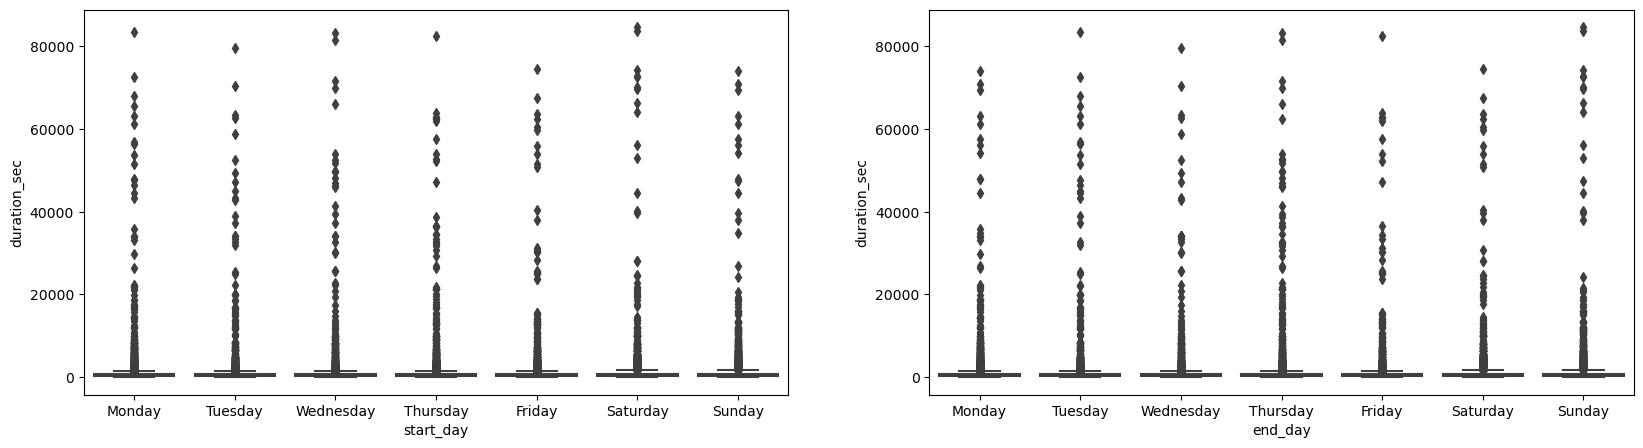

In [37]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color)

plt.subplot(1,2,2)
sb.boxplot(data = df, x = 'end_day', y = 'duration_sec', color = base_color);

As a result of the many outliers, the full nature of the relationship between trip duration and start and end day is not plotted.

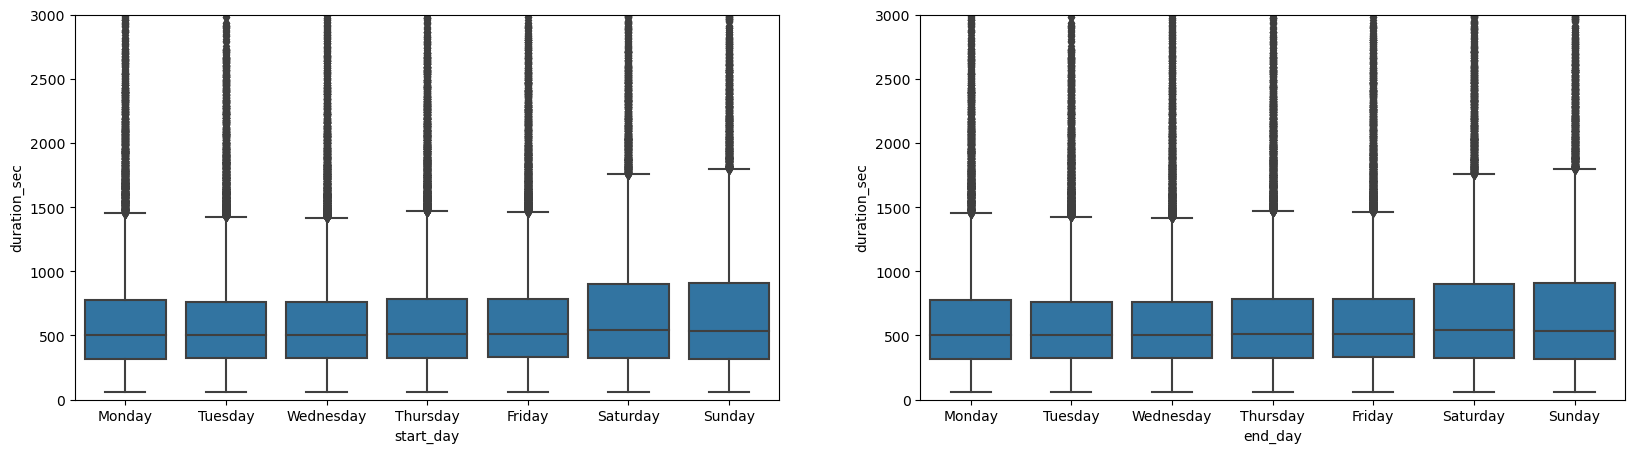

In [38]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color)
plt.ylim([0, 3000])

plt.subplot(1,2,2)
sb.boxplot(data = df, x = 'end_day', y = 'duration_sec', color = base_color)
plt.ylim([0, 3000]);

Trips are longer during weekends than during weekdays. However from earlier univariate exploration, trips least occured during weekends. This implies that although people who ride during weekends are less, they ride for longer periods than those who ride during the day.

__What is the relationship between trip duration and members birth year?__

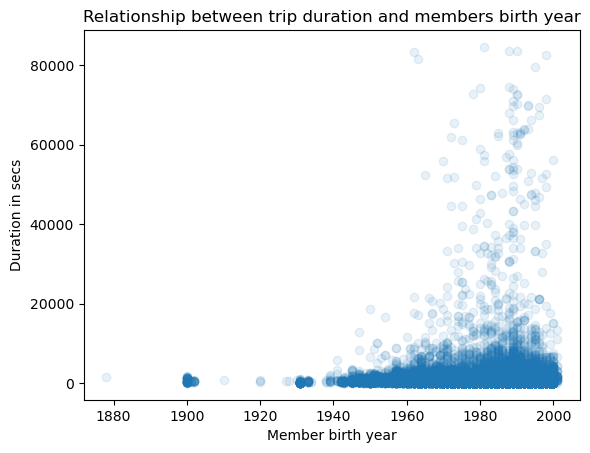

In [39]:
plt.scatter(data = df, x = 'member_birth_year', y = 'duration_sec', alpha = 0.1)
plt.xlabel('Member birth year')
plt.ylabel('Duration in secs')
plt.title('Relationship between trip duration and members birth year');

Riders that ride beyond 20000 seconds are born after 1960.

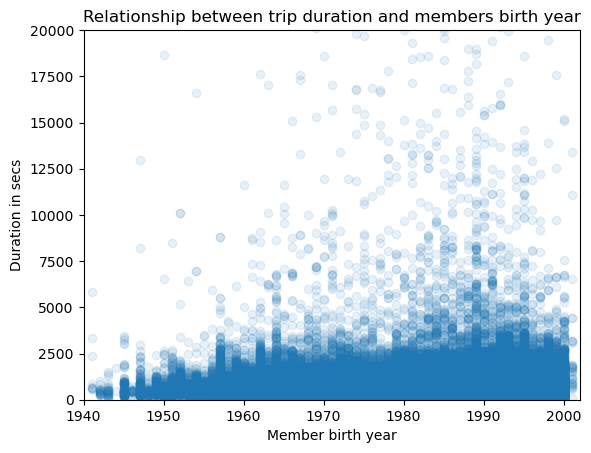

In [40]:
plt.scatter(data = df, x = 'member_birth_year', y = 'duration_sec', alpha = 0.1);
plt.xlim([1940, 2002])
plt.ylim([0, 20000])
plt.xlabel('Member birth year')
plt.ylabel('Duration in secs')
plt.title('Relationship between trip duration and members birth year');

A closer look at the data shows that there are even more riders born between 1950 and 2001 that go on trips below 3000 seconds.

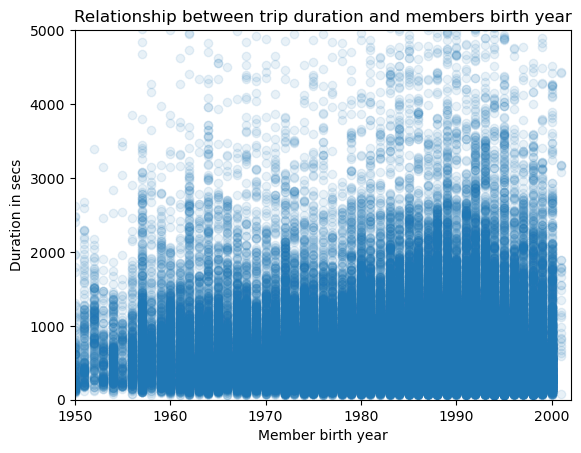

In [41]:
plt.scatter(data = df, x = 'member_birth_year', y = 'duration_sec', alpha = 0.1);
plt.xlim([1950, 2002])
plt.ylim([0, 5000])
plt.xlabel('Member birth year')
plt.ylabel('Duration in secs')
plt.title('Relationship between trip duration and members birth year');

__What is the relationship between trip duration and gender? Do males ride for longer periods than females?__

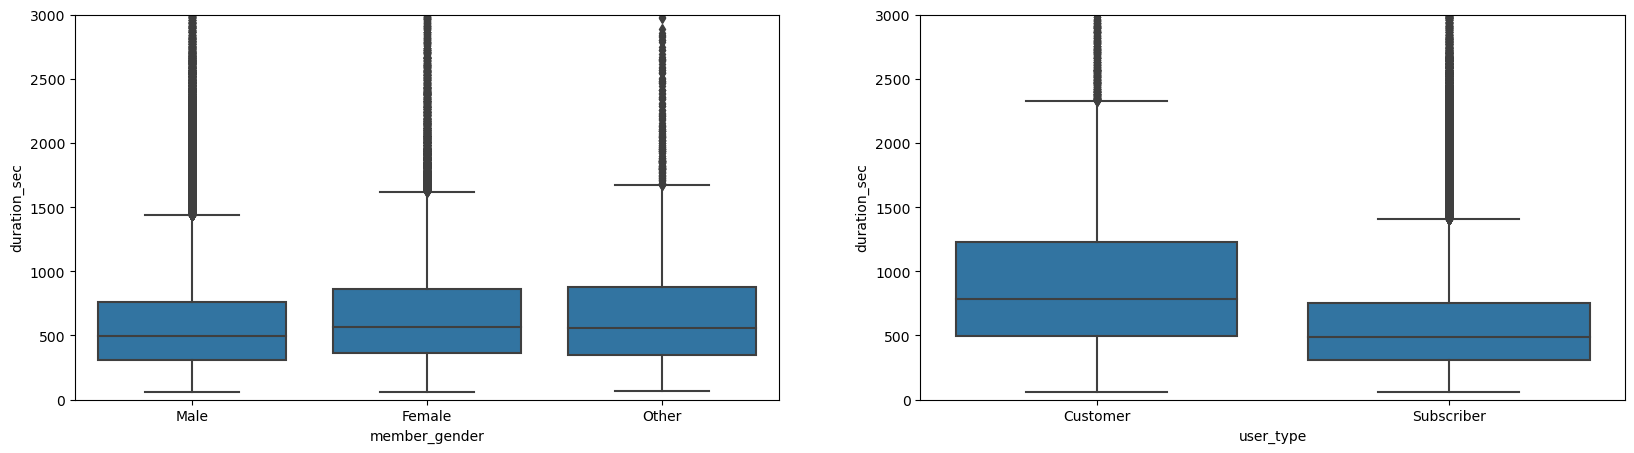

In [42]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color, order = df.member_gender.value_counts().index)
plt.ylim([0, 3000])

plt.subplot(1,2,2)
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([0, 3000]);

On average, females ride for longer duration that males while customers ride for longer duration than subscribers.

__What is the relationship between user type and gender?__

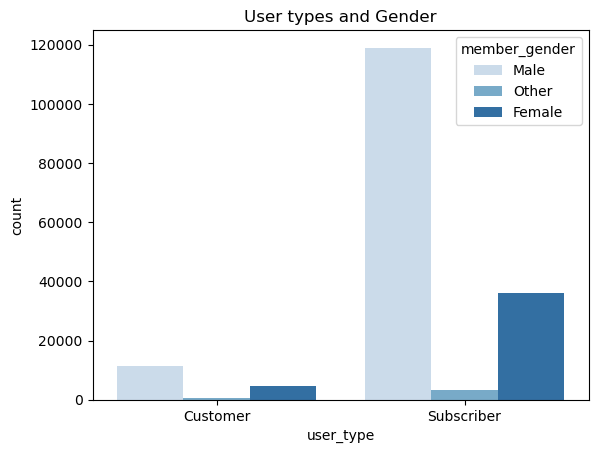

In [43]:
sb.countplot(data = df, x = 'user_type', hue = 'member_gender', palette = 'Blues')
plt.title('User types and Gender');

The proportion of males are greater than females in each of the user type.

__What is the relationship between user type and start days?__

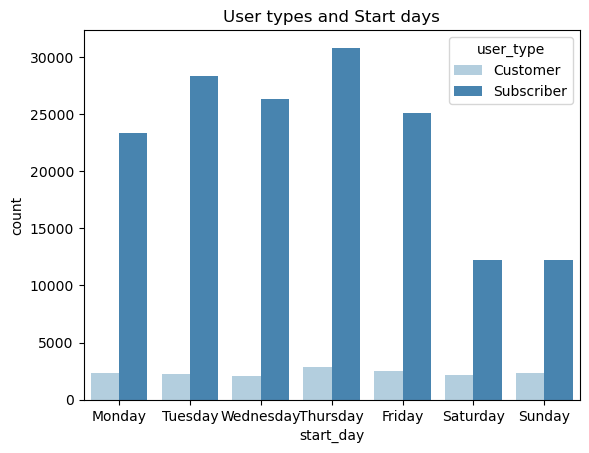

In [44]:
sb.countplot(data = df, x = 'start_day', hue = 'user_type', palette = 'Blues')
plt.title('User types and Start days');

Most subscribers ride on thursday, then tuesday, wednesday and friday, while weekends are the lowest. Most customers ride on thursday while wednesday has the lowest record.

## Multivariate exploration

__How long do subscribers and customers (user types) travel during each day of the week?__

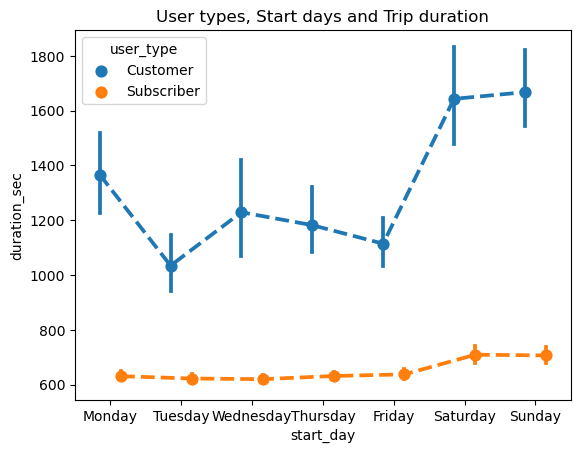

In [45]:
sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'user_type', dodge = 0.3, linestyles = "--")
plt.title('User types, Start days and Trip duration');

Customers travel more than subscriber during each day of the week. For each user type, the trip duration is higher on Weekends than on weekdays. However, customers travel for longer periods on Sundays than on Saturdays while it is vice versa for subscribers. 

__How long do each gender travel during each day of the week?__

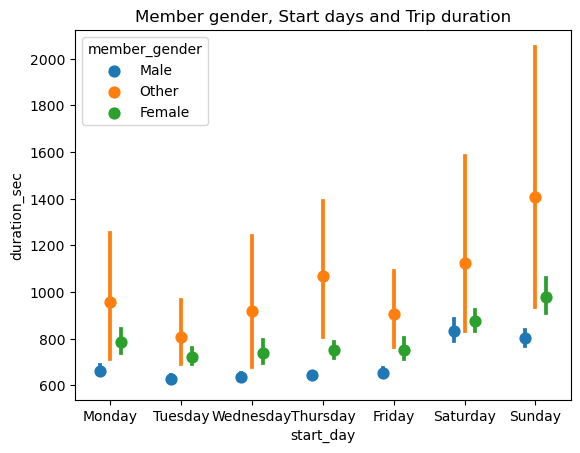

In [46]:
sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'member_gender', dodge = 0.3, linestyles = " ")
plt.title('Member gender, Start days and Trip duration');

Females ride for the longest average duration on Sunday and for the least average duration on Tuesday. The 'other' gender also ride more than the males on each day of the week. 

## Conclusion

During the univariate exploration of the bike data, the following insights were deduced:
- The data included records from February to March 2019
- Most rides were below 1000 seconds
- 90.5% of riders are subscribers
- 74.6% are males
- Most riders were born between 1985 and 1995
- Thursdays were the busiest day and 5pm, 8am, 6pm and 9am were the busiest hours

Findings from the bivariate exploration were:
- Trips are longer during weekends than during weekdays.
- Riders that are able to ride beyond 20000 seconds are born after 1960 and there are riders born between 1950 and 2001 go on trips below 3000 seconds.
- On average, females ride for longer duration that males while customers ride for longer duration than subscribers.
- The proportion of males are greater than females in each of the user type.
- Most subscribers ride on thursday while weekends are the lowest. Most customers ride on thursday while wednesday has the lowest record.

The multivaritate exploration showed that:
- Customers travel more than subscriber during each day of the week. For each user type, the trip duration is higher on Weekends than on weekdays. However, customers travel for longer periods on Sundays than on Saturdays while it is vice versa for subscribers.
- Females ride for the longest average duration on Sunday and for the least average duration on Tuesday. The 'other' gender also ride more than the males on each day of the week.